In [53]:
# Importing all the Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\myles\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\myles\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
# initializing the Dataset.
df = pd.read_csv("tweets_final_project_data(1).csv")

In [55]:
#calling the Dataset to check
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


# Cleaning

In [4]:
# Checking the sum of null values for each column.
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

<AxesSubplot:>

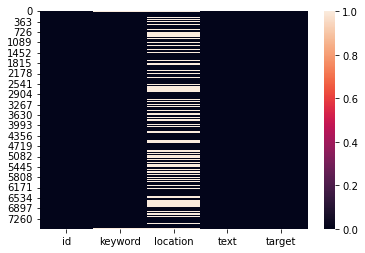

In [5]:
# plotting a heatmap to detect the null values.
sns.heatmap(df.isna())

<AxesSubplot:xlabel='target', ylabel='count'>

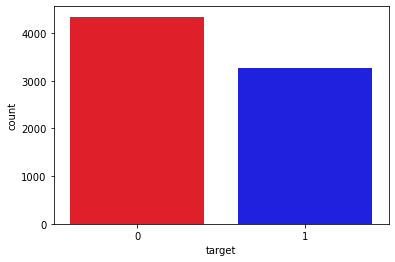

In [6]:
# Plotting a countplot to see number of target values that are 0 and 1. 
sns.countplot(x = 'target', data = df, palette=['#FF000F','#0000FF','#00FF00'])

In [7]:
#  computing a summary of statistics pertaining to the DataFrame columns
df.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [8]:
# printing out the shape of the dataframe
print(df.shape)

(7613, 5)


In [9]:
# Dropping all the duplicate values in text and target columns by keeping the first ones.
df.drop_duplicates(subset=['text', 'target'], keep='first')

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1


<AxesSubplot:xlabel='location'>

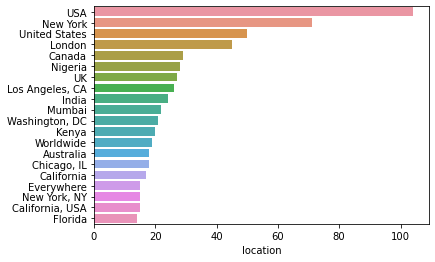

In [10]:
# Plotting the barplot Series containing counts of unique values for location.
sns.barplot(y=df['location'].value_counts()[:20].index,x=df['location'].value_counts()[:20])

In [56]:
# Replacing all the countries and cities to abbreviation form.
df['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                            "Washington, DC":'USA',
                            "Sacramento, CA":'USA',
                            "Nashville, TN":'USA',
                            "US":'USA',
                            "Denver, Colorado":'USA',
                            "Dallas, TX": "USA",
                            "San Diego, CA": "USA",                       
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Houston, TX":'USA',
                            "Memphis, TN":'USA',
                            "Manchester":'UK',
                            "Denver, CO":'USA',
                            "Tennessee":'USA',
                            "worldwide":'Worldwide',
                            "Sydney":'Australia',
                            "World":'Worldwide',
                            "Mumbai":"India"},inplace=True)

<AxesSubplot:xlabel='location'>

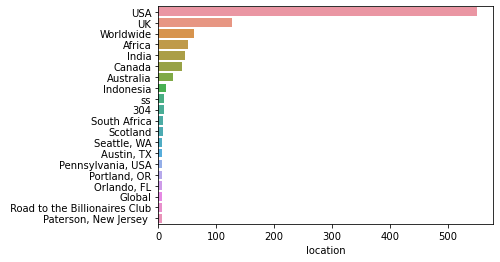

In [12]:
# Plotting the barplot Series containing counts of unique values for location after abbreviation.
sns.barplot(y=df['location'].value_counts()[:20].index,x=df['location'].value_counts()[:20])

# EDA

In [57]:
# definig a coumn text_length and assigning the length of words.
df['text_length'] = df.text.apply(lambda x: len(x.split()))

In [58]:
# describing text_length.
df['text_length'].describe()

count    7613.000000
mean       14.903586
std         5.732604
min         1.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        31.000000
Name: text_length, dtype: float64

In [15]:
# defining a variable is_real and assigning target values equal to 1.
is_real = df.loc[df['target'] == 1]

<AxesSubplot:xlabel='keyword'>

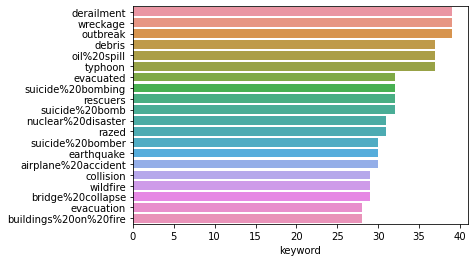

In [16]:
# Plotting the barplot Series containing counts of unique values that are real for keyword.
sns.barplot(y=is_real['keyword'].value_counts()[:20].index,x=is_real['keyword'].value_counts()[:20])

In [17]:
# defining a variable not_real and assigning target values equal to 0.
not_real = df.loc[df['target'] == 0]

<AxesSubplot:xlabel='keyword'>

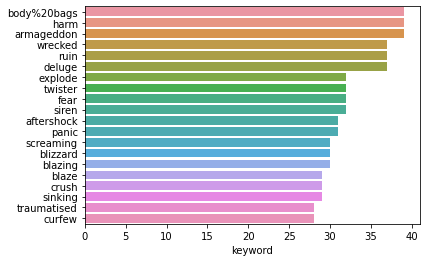

In [18]:
# Plotting the barplot Series containing counts of unique values that are not real for keyword.
sns.barplot(y=not_real['keyword'].value_counts()[:20].index,x=is_real['keyword'].value_counts()[:20])

<AxesSubplot:xlabel='keyword'>

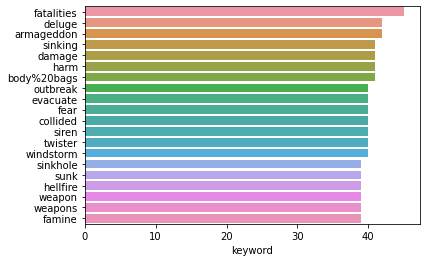

In [19]:
# Plotting the barplot Series containing counts of unique values for Keyword.
sns.barplot(y=df['keyword'].value_counts()[:20].index,x=df['keyword'].value_counts()[:20])

<AxesSubplot:xlabel='location'>

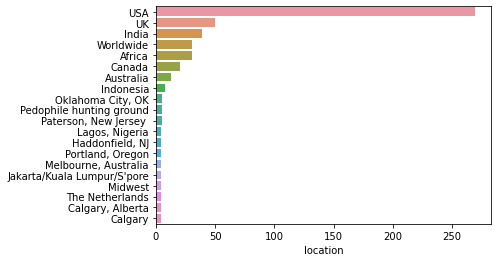

In [20]:
# Plotting the barplot Series containing counts of unique values that are real for Location.
sns.barplot(y=is_real['location'].value_counts()[:20].index,x=is_real['location'].value_counts()[:20])

<AxesSubplot:xlabel='location'>

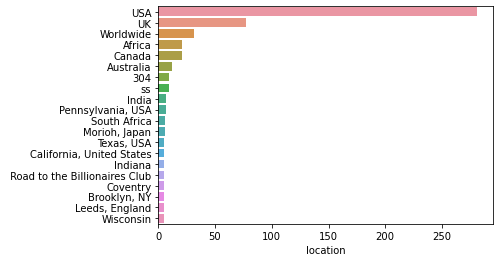

In [21]:
# Plotting the barplot Series containing counts of unique values that are not real for Location.
sns.barplot(y=not_real['location'].value_counts()[:20].index,x=not_real['location'].value_counts()[:20])

# Feature Engineering

In [59]:
# calling the text column to check.
df['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [60]:
# defining a function for cleaning the data like lower the text etc..
def clean_text(text):
    text= text.lower()
    text= re.sub('[0-9]', '', text)
    text  = "".join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens=[word for word in tokens if word not in stopwords.words('english')]
    text = ' '.join(tokens)
    return text

In [61]:
# Defining a column new_text and assigning the clean text from the function above.
df["new_text"]=df["text"].apply(clean_text)

In [80]:
# calling the new_text to check. (the text is now clean)
df['new_text'].head(10)

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
5    rockyfire update california hwy closed directi...
6    flood disaster heavy rain causes flash floodin...
7                           im top hill see fire woods
8    theres emergency evacuation happening building...
9                        im afraid tornado coming area
Name: new_text, dtype: object

In [26]:
#calling the first 5 rows to check.
df.head()

,id,keyword,location,text,target,text_length,new_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,got sent photo ruby alaska smoke wildfires pou...


In [27]:
# checking the first 20 rows of new_text
df['new_text'][:20]

0          deeds reason earthquake may allah forgive us
1                 forest fire near la ronge sask canada
2     residents asked shelter place notified officer...
3     people receive wildfires evacuation orders cal...
4     got sent photo ruby alaska smoke wildfires pou...
5     rockyfire update california hwy closed directi...
6     flood disaster heavy rain causes flash floodin...
7                            im top hill see fire woods
8     theres emergency evacuation happening building...
9                         im afraid tornado coming area
10                      three people died heat wave far
11    haha south tampa getting flooded hah wait seco...
12    raining flooding florida tampabay tampa days i...
13                      flood bago myanmar arrived bago
14           damage school bus multi car crash breaking
15                                            whats man
16                                          love fruits
17                                        summer

### Modeling

In [63]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

In [64]:
X = df['new_text'] # independent feature
y = df['target'] # dependent features

In [65]:
''' tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect 
    how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches 
    of information retrieval, text mining, and user modeling.
    The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the
    number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear
    more frequently in general and which will immensely help our model to give better results.'''

def evaluate_model_performance(X,y,model_object,model_name, run_times = 10, test_size = 0.1):
    print(f"\t\t====={model_name} Results=====\n")
    scores = []
    auc = []
    sss = StratifiedShuffleSplit(n_splits=run_times, test_size=test_size, random_state=0)  # shuffling the data  
    rf = model_object
    i = 0
    for train_index, test_index in sss.split(X, y):
        i+=1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # TfidfVectorizer is used to fit and transform the training data into a document-term matrix. 
        tfidf = TfidfVectorizer()
        X_train_tfidf = tfidf.fit_transform(np.array(X_train.values))
        X_test_tfdif = tfidf.transform(X_test)

        rf.fit(X_train_tfidf, y_train)
        pred = rf.predict(X_test_tfdif)
        ROC_AUC = roc_auc_score(y_test,rf.predict_proba(X_test_tfdif)[:, 1]) # checking AUC
        accuracy = accuracy_score(y_test, pred) # checking accuracy
        scores.append(accuracy)
        auc.append(ROC_AUC)
        print(f"for {i} execution : Accuracy={round(accuracy,3)}, AUC={round(ROC_AUC,3)}")
        

    # Printning the Average Accurracy and AUC of each prediction
    print("Average Accuracy :",round(np.mean(scores),3))
    print("Average AUC :",round(np.mean(auc),3))
    

    

In [31]:
rf = RandomForestClassifier()
evaluate_model_performance(X,y,rf,"RandomForestClassifier",run_times = 10, test_size = 0.1)

		=====RandomForestClassifier Results=====

for 1 execution : Accuracy=0.808, AUC=0.862
for 2 execution : Accuracy=0.785, AUC=0.838
for 3 execution : Accuracy=0.787, AUC=0.833
for 4 execution : Accuracy=0.764, AUC=0.828
for 5 execution : Accuracy=0.766, AUC=0.813
for 6 execution : Accuracy=0.772, AUC=0.845
for 7 execution : Accuracy=0.801, AUC=0.866
for 8 execution : Accuracy=0.793, AUC=0.857
for 9 execution : Accuracy=0.773, AUC=0.836
for 10 execution : Accuracy=0.783, AUC=0.836
Average Accuracy : 0.783
Average AUC : 0.841


In [32]:
lr = LogisticRegression()
evaluate_model_performance(X,y,lr,"LogisticRegression",run_times = 10, test_size = 0.1)

		=====LogisticRegression Results=====

for 1 execution : Accuracy=0.823, AUC=0.882
for 2 execution : Accuracy=0.791, AUC=0.854
for 3 execution : Accuracy=0.808, AUC=0.849
for 4 execution : Accuracy=0.777, AUC=0.832
for 5 execution : Accuracy=0.783, AUC=0.832
for 6 execution : Accuracy=0.798, AUC=0.866
for 7 execution : Accuracy=0.811, AUC=0.875
for 8 execution : Accuracy=0.807, AUC=0.873
for 9 execution : Accuracy=0.777, AUC=0.844
for 10 execution : Accuracy=0.799, AUC=0.844
Average Accuracy : 0.798
Average AUC : 0.855


In [33]:
gnb = GradientBoostingClassifier()
evaluate_model_performance(X,y,gnb,"GradientBoostingClassifier",run_times = 10, test_size = 0.1)

		=====GradientBoostingClassifier Results=====

for 1 execution : Accuracy=0.751, AUC=0.802
for 2 execution : Accuracy=0.722, AUC=0.79
for 3 execution : Accuracy=0.738, AUC=0.785
for 4 execution : Accuracy=0.719, AUC=0.759
for 5 execution : Accuracy=0.753, AUC=0.768
for 6 execution : Accuracy=0.743, AUC=0.787
for 7 execution : Accuracy=0.759, AUC=0.808
for 8 execution : Accuracy=0.747, AUC=0.818
for 9 execution : Accuracy=0.731, AUC=0.792
for 10 execution : Accuracy=0.714, AUC=0.773
Average Accuracy : 0.738
Average AUC : 0.788


In [34]:
xb = BaggingClassifier()
evaluate_model_performance(X,y,xb,"BaggingClassifier",run_times = 10, test_size = 0.1)

		=====BaggingClassifier Results=====

for 1 execution : Accuracy=0.776, AUC=0.83
for 2 execution : Accuracy=0.776, AUC=0.808
for 3 execution : Accuracy=0.76, AUC=0.8
for 4 execution : Accuracy=0.747, AUC=0.802
for 5 execution : Accuracy=0.764, AUC=0.79
for 6 execution : Accuracy=0.772, AUC=0.813
for 7 execution : Accuracy=0.811, AUC=0.856
for 8 execution : Accuracy=0.769, AUC=0.814
for 9 execution : Accuracy=0.748, AUC=0.795
for 10 execution : Accuracy=0.748, AUC=0.808
Average Accuracy : 0.767
Average AUC : 0.812


In [35]:
svc = SVC(probability=True)
evaluate_model_performance(X,y,svc,"SVM",run_times = 10, test_size = 0.1)

		=====SVM Results=====

for 1 execution : Accuracy=0.824, AUC=0.874
for 2 execution : Accuracy=0.797, AUC=0.847
for 3 execution : Accuracy=0.807, AUC=0.854
for 4 execution : Accuracy=0.776, AUC=0.829
for 5 execution : Accuracy=0.783, AUC=0.823
for 6 execution : Accuracy=0.799, AUC=0.869
for 7 execution : Accuracy=0.808, AUC=0.873
for 8 execution : Accuracy=0.814, AUC=0.87
for 9 execution : Accuracy=0.793, AUC=0.844
for 10 execution : Accuracy=0.787, AUC=0.843
Average Accuracy : 0.799
Average AUC : 0.853


In [36]:
dt = DecisionTreeClassifier()
evaluate_model_performance(X,y,dt,"DecisionTreeClassifier",run_times = 10, test_size = 0.1)

		=====DecisionTreeClassifier Results=====

for 1 execution : Accuracy=0.715, AUC=0.715
for 2 execution : Accuracy=0.752, AUC=0.75
for 3 execution : Accuracy=0.745, AUC=0.744
for 4 execution : Accuracy=0.72, AUC=0.718
for 5 execution : Accuracy=0.694, AUC=0.692
for 6 execution : Accuracy=0.723, AUC=0.721
for 7 execution : Accuracy=0.759, AUC=0.752
for 8 execution : Accuracy=0.738, AUC=0.735
for 9 execution : Accuracy=0.722, AUC=0.715
for 10 execution : Accuracy=0.724, AUC=0.718
Average Accuracy : 0.729
Average AUC : 0.726



# We see from above that...
Support Vector Machine & Logistic Regression give us the best results so we perform Hyperparameter tuning for the same

# Hyperparameter Tuning for SVM

In [64]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [73]:
param_grid = {'C': [10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

In [74]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.1,random_state=0)
# TfidfVectorizer is used to fit and transform the training data into a document-term matrix.
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train.values)
X_test_tfdif = tfidf.transform(X_test)

In [75]:
model = GridSearchCV(svc, param_grid, 
                     scoring='accuracy', verbose=3)

In [76]:
model.fit(X_train_tfidf,Y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.802 total time=  12.4s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.777 total time=  12.4s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.804 total time=  12.6s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.798 total time=  12.4s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.796 total time=  12.4s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.791 total time=  12.3s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.767 total time=  11.9s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.797 total time=  12.1s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.788 total time=  12.5s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.791 total time=  11.9s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.746 total time=  11.4s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;,

GridSearchCV(estimator=SVC(C=10.0, gamma=1, probability=True),
             param_grid={'C': [10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [77]:
print(model.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [78]:
svc = SVC(probability=True, C=10.0, gamma=1, kernel='rbf')
evaluate_model_performance(X,y,svc,"SVM",run_times = 10, test_size = 0.1)

		=====SVM Results=====

for 1 execution : Accuracy=0.812, AUC=0.87
for 2 execution : Accuracy=0.798, AUC=0.846
for 3 execution : Accuracy=0.798, AUC=0.844
for 4 execution : Accuracy=0.774, AUC=0.831
for 5 execution : Accuracy=0.782, AUC=0.818
for 6 execution : Accuracy=0.797, AUC=0.866
for 7 execution : Accuracy=0.803, AUC=0.862
for 8 execution : Accuracy=0.807, AUC=0.869
for 9 execution : Accuracy=0.785, AUC=0.831
for 10 execution : Accuracy=0.791, AUC=0.841
Average Accuracy : 0.795
Average AUC : 0.848


# Hyperparameter Tuning for Logistic Regression

In [43]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [44]:
param_grid = {'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}

In [45]:
model = GridSearchCV(lr, param_grid, 
                     scoring='accuracy', verbose=3)

In [46]:
model.fit(X_train_tfidf,Y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solve

C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selectio

[CV 5/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.569 total time=   0.0s
[CV 1/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.568 total time=   0.0s
[CV 2/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.569 total time=   0.0s
[CV 3/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.569 total time=   0.0s
[CV 4/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.569 total time=   0.0s
[CV 5/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.569 total time=   0.0s
[CV 1/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.568 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.569 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.569 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.569 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.569 total time=   0.0s
[CV 1/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] E

C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selectio

[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.569 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.569 total time=   0.0s
[CV 1/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.568 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.569 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.569 total time=   0.0s
[CV 4/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.569 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.569 total time=   0.0s
[CV 1/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.568 total time=   0.0s
[CV 2/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.569 total time=   0.0s
[CV 3/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.569 total time=   0.0s
[CV 4/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.569 total time=   0.0s
[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.569 total time=   0.0s
[CV 1/5] END C

C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selectio

[CV 1/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 2/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.671 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.665 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.680 total time=   0.0s
[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.671 total time=   0.0s
[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.686 total time=   0.0s
[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.665 total time=   0.0s
[CV 5/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.680 total time=   0.0s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.681 total time=   0.0s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.672 total time=   0.0s
[CV 3/5] END C=0.1, p

C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selectio

[CV 1/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.744 total time=   0.0s
[CV 3/5] END C=1.0, penalt

C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selectio

[CV 1/5] END C=10.0, penalty=l1, solver=liblinear;, score=0.794 total time=  14.5s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END C=10.0, penalty=l1, solver=liblinear;, score=0.760 total time=  14.1s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END C=10.0, penalty=l1, solver=liblinear;, score=0.780 total time=  14.6s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END C=10.0, penalty=l1, solver=liblinear;, score=0.782 total time=  13.9s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END C=10.0, penalty=l1, solver=liblinear;, score=0.782 total time=  13.4s
[CV 1/5] END C=10.0, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.0s
[CV 2/5] END C=10.0, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 3/5] END C=10.0, penalty=l2, solver=newton-cg;, score=0.803 total time=   0.0s
[CV 4/5] END C=10.0, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.0s
[CV 5/5] END C=10.0, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.0s
[CV 1/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.1s
[CV 2/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.2s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.803 total time=   0.2s
[CV 4/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.796 total time=   0.1s
[CV 5/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.2s
[CV 1/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.797 total time=   0.0s
[CV 2/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.766 total time=   0.0s
[CV 3/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.803 total time=   0.0s
[CV 4/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 5/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=100.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C

C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selectio

[CV 1/5] END C=100.0, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 2/5] END C=100.0, penalty=l1, solver=liblinear;, score=0.769 total time=   0.0s
[CV 3/5] END C=100.0, penalty=l1, solver=liblinear;, score=0.770 total time=   0.0s
[CV 4/5] END C=100.0, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=100.0, penalty=l1, solver=liblinear;, score=0.775 total time=   0.0s
[CV 1/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.791 total time=   0.0s
[CV 2/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.759 total time=   0.0s
[CV 3/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 4/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.785 total time=   0.0s
[CV 5/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.0s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.2s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.758 total time=   0.2s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.788 total time=   0.2s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.785 total time=   0.3s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.2s
[CV 1/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.791 total time=   0.0s
[CV 2/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.759 total time=   0.0s
[CV 3/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.788 total time=   0.0s
[CV 4/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.785 total time=   0.0s
[CV 5/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.780 total time=   0.0s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selectio

[CV 1/5] END C=1000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ..C=1000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ..C=1000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ..C=1000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ..C=1000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ..C=1000.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000.0, penalty=l1, solver=liblinear;, score=0.787 total time=   0.1s
[CV 2/5] END C=1000.0, penalty=l1, solver=liblinear;, score=0.768 total time=   0.1s
[CV 3/5] E

C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.787 total time=   0.2s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.758 total time=   0.2s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.781 total time=   0.3s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.782 total time=   0.4s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.769 total time=   0.3s
[CV 1/5] END C=1000.0, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=1000.0, penalty=l2, solver=liblinear;, score=0.758 total time=   0.0s
[CV 3/5] END C=1000.0, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 4/5] END C=1000.0, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 5/5] END C=1000.0, penalty=l2, solver=liblinear;, score=0.772 total time=   0.0s


C:\Users\myles\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.56853019 0.56853019 0.56853019 0.56853019
        nan        nan 0.56853019 0.56853019 0.56853019 0.56853019
        nan        nan 0.56984406 0.67625112 0.67625112 0.67654299
        nan        nan 0.7692286  0.79696167 0.79696167 0.79681569
        nan        nan 0.77959218 0.79243836 0.79243836 0.79229238
        nan        nan 0.77696487 0.78046852 0.78032253 0.78046852
        nan        nan 0.77433766 0.7762359  0.77535956 0.7762359 ]
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=3)

In [47]:
print(model.best_params_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [48]:
lr = LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
evaluate_model_performance(X,y,lr,"LogisticRegression",run_times = 10, test_size = 0.1)

		=====LogisticRegression Results=====

for 1 execution : Accuracy=0.823, AUC=0.882
for 2 execution : Accuracy=0.791, AUC=0.854
for 3 execution : Accuracy=0.808, AUC=0.849
for 4 execution : Accuracy=0.777, AUC=0.832
for 5 execution : Accuracy=0.783, AUC=0.832
for 6 execution : Accuracy=0.798, AUC=0.866
for 7 execution : Accuracy=0.811, AUC=0.875
for 8 execution : Accuracy=0.807, AUC=0.873
for 9 execution : Accuracy=0.777, AUC=0.844
for 10 execution : Accuracy=0.799, AUC=0.844
Average Accuracy : 0.798
Average AUC : 0.855
